In [36]:
# Tutorial: https://www.youtube.com/watch?v=kCc8FmEb1nY&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=9

In [1]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
#!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In Transformers, the dot product is called **attention** because it is the mechanism that determines how much importance (or attention) should be given to other elements in a sequence when processing a particular element.

### Intuition Behind Attention as Dot Product

1. **Similarity Measurement**:  
   - The **dot product** between two vectors (queries \(Q\) and keys \(K\)) measures their similarity or alignment.  
   - When processing a word (or token) in a sequence, the model calculates how similar it is to other words in the same sequence. Words with higher similarity scores are deemed more relevant.

2. **Context Gathering**:  
   - Attention assigns a weight to each word (based on similarity), allowing the model to focus more on relevant words when generating the output.  
   - For example, in the sentence "The cat sat on the mat," when the model processes "sat," it might pay more attention to "cat" because they are contextually related.

3. **Scaling with Softmax**:  
   - After computing the dot product, a softmax function normalizes the scores into probabilities. These probabilities represent how much attention should be paid to each word.

4. **Dynamic Focus**:  
   - Unlike static methods, attention dynamically computes relevance for each token in the context of the current query. This adaptability enables the model to focus on different words depending on the input.

### Why Call It "Attention"?  
The term "attention" comes from its purpose:  
- Just like humans selectively focus on certain parts of a scene, the attention mechanism allows the model to focus on relevant parts of the input sequence while processing.

### Mathematical Breakdown
- Given \(Q\), \(K\), and \(V\) matrices (queries, keys, and values):  
  $$
  \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
  $$  
- Here:
  - \(QK^T\): Dot product determines how similar each query is to each key.
  - \(\text{softmax}()\): Converts these scores into a probability distribution.
  - \(V\): Combines information from all values weighted by attention scores.

In essence, attention via the dot product enables the model to allocate focus dynamically and contextually, forming the foundation of the Transformer architecture's power.

**Perplexity** is a metric used in Natural Language Processing (NLP) to evaluate how well a probabilistic model (like a language model) predicts a sequence of words. It quantifies the level of "uncertainty" or "surprise" the model has when encountering a given dataset.

### Definition of Perplexity

Perplexity is formally defined as the exponentiated average negative log-likelihood of a sequence. For a sequence of \(N\) words \(w_1, w_2, \ldots, w_N\), with a language model assigning probabilities $\(P(w_1), P(w_2 | w_1), \ldots, P(w_N | w_1, \ldots, w_{N-1})\)$, the perplexity is:

$$
\text{Perplexity} = 2^{-\frac{1}{N} \sum_{i=1}^{N} \log_2 P(w_i | w_1, \ldots, w_{i-1})}
$$

Alternatively, using natural logarithms:

$$
\text{Perplexity} = e^{-\frac{1}{N} \sum_{i=1}^{N} \log P(w_i | w_1, \ldots, w_{i-1})}
$$

### Intuition Behind Perplexity

1. **Measure of Predictability**:  
   - Lower perplexity means the model assigns higher probabilities to the actual words in the sequence, indicating better performance.
   - Higher perplexity means the model is less confident or incorrect in its predictions.

2. **Interpretation**:  
   - Perplexity can be thought of as the "effective size" of the set of plausible next words according to the model.
   - For example, if the perplexity is 10, the model effectively considers 10 equally likely words at each step.

3. **Ideal Case**:  
   - A perfect language model (that always assigns a probability of 1 to the correct word) has a perplexity of 1.
   - A model with uniformly random predictions over \(V\) words in the vocabulary will have a perplexity of \(V\).

### Practical Usage

1. **Evaluation Metric**:
   - Perplexity is commonly used to compare language models during training and testing.
   - Lower perplexity indicates a better model.

2. **Challenges**:
   - Perplexity is sensitive to the size of the vocabulary. Models trained on larger vocabularies often have higher perplexity because probabilities are spread out over more words.
   - It may not directly correlate with downstream task performance (e.g., translation or summarization).

### Example

Suppose a language model predicts the next word in a sentence, and for a sequence \(w_1, w_2, w_3\), it assigns probabilities:
$$
P(w_1) = 0.2, \, P(w_2 | w_1) = 0.5, \, P(w_3 | w_1, w_2) = 0.25
$$
Then, the perplexity for this sequence is:

$$
\text{Perplexity} = \sqrt[3]{\frac{1}{0.2 \times 0.5 \times 0.25}} = \sqrt[3]{40} \approx 3.42
$$
This means the model is, on average, as "confused" as if there were about 3.42 equally likely choices at each step.

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

------------------------------------------------------------------------------------

Tuning hyperparameters for transformer models can be complex, but there are some guidelines and strategies to make it more systematic and effective. Here are some tips for each parameter:

### 1. **Batch Size**
   - Larger batch sizes can speed up training, but they also r1.220673 Mequire more memory, which could be a constraint depending on your hardware (like your RTX 2060 GPU).
   - Start with a smaller batch size (e.g., 8 or 16) and increase gradually if your GPU allows.
   - Alternatively, gradient accumulation can mimic larger batch sizes without increasing actual memory usage.

### 2. **Block Size (Sequence Length)**
   - This controls the length of the sequence used as input. Higher values improve the model's capacity to capture long-range dependencies, but at the cost of increased memory usage.
   - Experiment with small values (e.g., 32, 64) and increase based on your dataset's average sequence length. For very long sequences, consider breaking them up and applying techniques like masking to capture contextual information.

### 3. **Learning Rate**
   - Start with a learning rate around \(1e-4\) or \(1e-3\) and use learning rate schedulers like cosine decay or step decay.
   - If training is unstable, reduce the learning rate, as high learning rates can cause exploding gradients in transformer models.
   - Use smaller learning rates for fine-tuning pre-trained models.

### 4. **Dropout Rate**
   - Generally, 0.1 to 0.3 is a good range to start with. For larger datasets, lower dropout (around 0.1) may be suitable, while smaller datasets may need a higher dropout to avoid overfitting.

### 5. **Embedding Size (`n_embd`)**
   - Start with small values like 64 or 128 if your model size is restricted by hardware. However, `n_embd` should ideally be divisible by `n_head`.
   - Increase `n_embd` if you’re observing underfitting (model is unable to learn the complexities of the dataset).
   
### 6. **Number of Heads (`n_head`)**
   - Usually, `n_embd` divided by `n_head` should result in an integer for ease of implementation.
   - For a small model, starting with 8 heads should work well. Increasing it may allow the model to capture more complex relationships but will require more memory.

### 7. **Number of Layers (`n_layer`)**
   - Start with 4–6 layers and increase as needed, depending on your hardware.
   - More layers can improve model performance but may lead to overfitting or excessive computational load. You can also experiment with 12 layers if using techniques like regularization or dropout.

### 8. **Evaluation Interval and Iterations**
   - For `max_iters`, set it high, but use early stopping based on validation loss to prevent unnecessary computation.
   - `eval_interval` and `eval_iters` can be adjusted to balance frequency of evaluations with performance overhead. More frequent evaluations provide more insights into learning dynamics but increase runtime.

### **Practical Tips for Hyperparameter Tuning**
- **Learning Rate Finder**: Gradually increase the learning rate and observe the loss. It can give you an idea of a good learning rate range.
- **Grid Search or Random Search**: Start with a coarse grid or a randomized search to find promising values and then perform a finer search around these values.
- **Optuna and Hyperopt**: Tools like Optuna can automate hyperparameter tuning by efficiently navigating the search space based on Bayesian optimization.

Let me know if you’d like to dive deeper into tuning specific parameters, especially given your GPU constraints!

Training a transformer model, even with a smaller vocabulary size like 512, can still be slow due to the complexity of self-attention operations and the number of parameters in the model. Here are some tips to speed up training on your setup:

1. **Mixed-Precision Training (FP16)**:
   - Mixed-precision training allows computations to be done in 16-bit floating-point precision instead of 32-bit, reducing memory usage and speeding up training. NVIDIA’s **Apex library** or **PyTorch’s `torch.cuda.amp`** module can help with this. The RTX 2060 supports FP16, so this could give a performance boost.

2. **Reduce Model Depth or Width**:
   - If feasible, consider using fewer layers (reduce the depth) or fewer attention heads in the model. This will reduce the number of parameters and speed up training. For example, using a 6-layer transformer instead of a 12-layer one or reducing the number of heads from 12 to 8 could make a noticeable difference.

3. **Gradient Accumulation**:
   - If batch size is small due to memory limitations, gradient accumulation can simulate a larger batch size by accumulating gradients over multiple forward passes before updating weights. This can help with stability and possibly improve convergence speed.

4. **Optimize Data Loading**:
   - Ensure your data pipeline is efficient. Use **`DataLoader`** with `num_workers` for parallel data loading if using PyTorch, which can reduce waiting time for each batch.

5. **Reduce Sequence Length (if possible)**:
   - Training time scales with sequence length due to the self-attention mechanism. If you can shorten your input sequences without losing context, it can speed up each training iteration.

6. **Increase Learning Rate or Use Warmup**:
   - Using a slightly higher learning rate or a learning rate schedule with warmup can help the model converge faster. Be cautious, as too high of a learning rate can destabilize training.

7. **Use a Smaller Batch Size with Gradient Accumulation**:
   - If your model’s batch size is limited by memory, setting a smaller batch size and accumulating gradients over multiple steps may help.

8. **Profile the Training Loop**:
   - Tools like **PyTorch’s profiler** can help identify bottlenecks. For example, you might find that a large portion of time is spent on specific operations or data loading.

Let me know if you want more details on any of these techniques!

Reducing the number of attention heads in a multihead attention mechanism doesn’t necessarily decrease the total number of model parameters because of how the parameters are allocated across different parts of the model. Here’s why this happens:

1. **Fixed Projection Dimension**:
   - In multihead attention, the total dimensionality of the attention projection is typically fixed (e.g., 512 or 768) regardless of the number of heads. For example, if the model's hidden dimension is 512, it will still remain 512 even if you reduce the number of heads. 
   - Reducing the number of heads doesn’t change the overall dimensionality of the query, key, and value matrices; instead, it just changes how the dimensionality is split across each head.

2. **Parameter Distribution Across Attention Layers**:
   - The query, key, and value matrices in the multihead attention layer are still projected to the same dimensionality, so the number of parameters in each of these matrices remains unchanged.
   - When you reduce the number of heads, the model simply divides the same total projection size into fewer heads, making each head slightly "wider" but keeping the total parameter count constant.

3. **Feed-Forward Layers Remain Unchanged**:
   - In transformer layers, a significant portion of parameters is also in the feed-forward network (FFN) layer after the attention layer. This layer is independent of the number of attention heads and typically has a large number of parameters that remain the same.

### How to Actually Reduce Parameters
To reduce the number of parameters effectively, you could try the following:

- **Reduce the Model’s Hidden Dimension**: Reducing the hidden dimension of the transformer (e.g., from 512 to 384) will decrease the size of both the attention and feed-forward layers, lowering parameter count overall.
- **Reduce the Number of Layers**: Reducing the number of transformer layers (depth of the model) will decrease the number of parameters as each layer contains independent parameters.
- **Decrease FFN Dimension**: The FFN layer often has a higher dimension than the model's hidden size (e.g., 4x the hidden dimension). Reducing this factor will also reduce the parameter count significantly.

Let me know if you’d like more specifics on adjusting these aspects in your model!

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import sys
sys.path.append("/home/karapathy_trainings/")
# from tokenizer.minbpe.minbpe import BasicTokenizer
import tiktoken
import datetime
import json
import os
get_datetime = lambda x: f"{x.day}_{x.month}_{x.year}_{x.hour}_{x.minute}"

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# tokenizer_ = BasicTokenizer()
# tokenizer_.load("/home/karapathy_trainings/tokenizer/minbpe/bpe_encoding.model")

In [4]:
with open("config/hyperparam.json", "r") as file:
    hyperparams = json.load(file)
    file.close()

In [5]:
# hyperparameters
batch_size = hyperparams.get("batch_size", 8) # how many independent sequences will we process in parallel?
block_size = hyperparams.get("block_size", 100) # what is the maximum context length for predictions?
max_iters = hyperparams.get("max_iters", 100)
eval_interval = hyperparams.get("eval_interval", 500)
learning_rate = hyperparams.get("learning_rate", 0.01)
eval_iters = hyperparams.get("eval_iters", 200)
n_embd = hyperparams.get("n_embd", 768) # should be a number divisible by n_head
n_head = hyperparams.get("n_head", 16) 
n_blocks = hyperparams.get("n_blocks", 8)
dropout = hyperparams.get("dropout", 0.1)
# ------------

In [6]:
device, hyperparams

('cuda',
 {'batch_size': 8,
  'block_size': 32,
  'max_iters': 3000,
  'eval_interval': 100,
  'learning_rate': 0.0001,
  'eval_iters': 200,
  'n_embd': 768,
  'n_head': 4,
  'n_blocks': 6,
  'dropout': 0.3})

In [7]:
torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }

encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string


# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [8]:
ix = torch.randint(len(data) - block_size, (batch_size,))

In [9]:
ix.shape

torch.Size([8])

In [10]:
len(text)

1115395

In [11]:
# torch.manual_seed(1337)

# # wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
# with open('input.txt', 'r', encoding='utf-8') as f:
#     text = f.read()

# # here are all the unique characters that occur in this text
# vocab = tokenizer_.vocab
# vocab_size = len(vocab)
                 
# # Train and test splits
# #data = torch.tensor(encode(text), dtype=torch.long)

# data = torch.tensor(tokenizer_.encode(text), dtype=torch.long)
# n = int(0.9*len(data)) # first 90% will be train, rest val
# train_data = data[:n]
# val_data = data[n:]

In [12]:
vocab_size

65

In [13]:
def save_model_details(path, hyperparams, model, loss_step_details):
    s = get_datetime(datetime.datetime.now())
    path_ = os.path.join(path,s)
    if not os.path.exists(path_):
        os.makedirs(path_)
    root = path_
    try:
        with open(f"{path_}/hyperparams.json","w") as f:
            json.dump(hyperparams, f)
            f.close()
    except:
        pass
        
    try:
        with open(f"{path_}/loss.json","w") as f:
            json.dump(loss_step_details, f)
            f.close()
    except:
        pass
        
    torch.save(model, f"{path_}/minigpt.model")

In [14]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [15]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
#             nn.Linear(4*n_embd, 8 * n_embd),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(8*n_embd, 4 * n_embd),
#             nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x)) # residual connection
        x = x + self.ffwd(self.ln2(x)) # residual connection
        return x

In [16]:
# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        #--------------------------------------------------#
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd) #** Learnable Token Embedding
        self.position_embedding_table = nn.Embedding(block_size, n_embd) #** Learnable Positional Encoding
        #--------------------------------------------------#
        
        #-------------- Enters the transformer block ------#
        #self.sa_head = MultiHeadAttention(n_head, n_embd//4) #Head(n_embd)
        #self.ff = FeedFoward(n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_blocks)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)
        #--------------------------------------------------#

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        #x = self.sa_head(x)
        #x = self.ff(x)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)
        
        #### No Softmax needed as cross_entropy function in pytorch internally applies
        #### the softmax before loss calculation
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            print("****",idx_cond.shape)
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
            #print(idx)
        return idx

In [17]:
model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

42.639425 M parameters


In [18]:
loss_curve = {}
max_iters = 0

In [19]:
for iter in range(max_iters, max_iters+1000):
    iter_loss_temp = {}
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()

        iter_loss_temp['train'] = float(f"{losses['train'].item():.4f}")
        iter_loss_temp['val'] = float(f"{losses['val'].item():.4f}")
        loss_curve[iter] = iter_loss_temp 
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
max_iters += 1000

step 0: train loss 4.3607, val loss 4.3572
step 100: train loss 2.5728, val loss 2.5842
step 200: train loss 2.4751, val loss 2.4885
step 300: train loss 2.3574, val loss 2.3642


KeyboardInterrupt: 

In [19]:
# loss_curve_ = {}

# for k, v in loss_curve.items():
#     temp = {}
#     for k1, v1 in v.items():
#         temp[k1] = float(f"{v1.item():.4f}")
#         loss_curve_[k] = temp

In [21]:
save_model_details("saved_model_checkpoints",hyperparams,m,loss_curve)

In [20]:
# generate from the model
torch.manual_seed(10)
context = torch.zeros((1, 1), dtype=torch.long
                      , device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


Loond spet in fim Vimp me-time the, teat frewn, weet sooow no login to so seseeseers'd dand sham,
To. Mask e be we wime thalle a they woued,
Wer go blarth and any with the le eent wuty ndow romenepals faess dious ser;
Tre, ner on sorme in a Ist band magre,
And com se the up to spenconce thumpe,
Tive on sain op, congsIed cien, framese, agat, mabulave!
Wiph, yoand faille, sabbeinl sind;
Bept, thin reat youg fith?

PUMESBES:
Iblome ke de id asee nelce int her thowe will spes: theee swith mark swer unet the on at Wershe ,in:
Awith they le noul meare to an cinsts deare thay?
The sawhing thie whoy tragote stons; me,
Theme consence on groive ist
A stiree kne Go dest pe the passey.

GLARD:
Lin: mer him your yere beavere ansed and thise sper nearsbe neaft sperey oir the too gooow sen, en
un weat thire Wour rou thate perty
Re peapesee hid reade hean thatish,
Any smaid decr thire! with thatt wowe and tham haithy.

BULEY HARY EO:
Ore, seno sirt to nieg and graves,
Roo, note to my ly beay thom on 

### Inference by Loading Saved Model

In [23]:
m_ = torch.load("saved_model_checkpoints/3_11_2024_18_24/minigpt.model")

In [24]:
with open("saved_model_checkpoints/3_11_2024_14_25/hyperparams.json", "r") as file:
    hyperparams = json.load(file)
    file.close()

In [25]:
# hyperparameters
batch_size = hyperparams.get("batch_size", 8) # how many independent sequences will we process in parallel?
block_size = hyperparams.get("block_size", 100) # what is the maximum context length for predictions?
max_iters = hyperparams.get("max_iters", 100)
eval_interval = hyperparams.get("eval_interval", 500)
learning_rate = hyperparams.get("learning_rate", 0.01)
eval_iters = hyperparams.get("eval_iters", 200)
n_embd = hyperparams.get("n_embd", 768) # should be a number divisible by n_head
n_head = hyperparams.get("n_head", 16) 
n_blocks = hyperparams.get("n_blocks", 8)
dropout = hyperparams.get("dropout", 0.1)
# ------------

In [27]:
# generate from the model
#torch.manual_seed(10)
context = torch.zeros((1, 1), dtype=torch.long
                      , device=device)
print(decode(m_.generate(context, max_new_tokens=2000)[0].tolist()))


stry in't.

JUCIO:
Madamuch grow's tieens, a the well is with aidurest
Shand what, much stell ger proud,
And this, wither but I was
That proor mann's dightio, as you ungelyout a son,
What staaist suchorful.
Onr Glo? A dielows thou bannot lord of an woman your wrich meliever;
Ay, bef lie,s, merrants, but wherest of our you I but do word'd
Date did Suntruceds. Some it, are I preace
With coue a nature I, have king, newers on,
Somar.' O in she that word, as may have stand if is succh.

DORD Servose, Landshort of GuOUCESTER:
Thoughost of your a mon:
Here the wrant by everings from onithet, while
entl my not than lad? I thangur'd I know though word fher leart's that I his garainst Tutsendy.

Numpherter:
Unge betcy
Will, my you landed well in Here's save
Tyser brokest.
Come mucio, arroth thand dabe his kess word's nor tead
So of thousandest to devinguur trestemas,
That's by man not Morbasted?

TLEORENTESS OF YORK:
Withat, doway.
With stard,---
And your ventainser,
And them'd you seture, subj

In [28]:
with open("saved_model_checkpoints/3_11_2024_14_25/loss.json", "r") as file:
    loss_curve = json.load(file)
    file.close()

In [32]:
import pandas as pd
loss_df = pd.DataFrame(loss_curve).T

<Axes: >

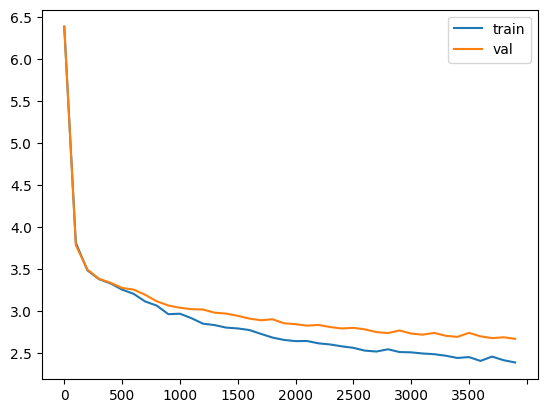

In [33]:
loss_df.plot()